# NETFLIX USERBASE

## About Dataset
> The dataset provides a snapshot of a sample Netflix userbase, showcasing various aspects of user subscriptions, revenue, account details, and activity. Each row represents a unique user, identified by their User ID. The dataset includes information such as the user's subscription type (Basic, Standard, or Premium), the monthly revenue generated from their subscription, the date they joined Netflix (Join Date), the date of their last payment (Last Payment Date), and the country in which they are located.

In [73]:
# importing the necessary library for EDA

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [74]:
# Reading the data

netflix = pd.read_csv("/kaggle/input/netflix-userbase-dataset/Netflix Userbase.csv", parse_dates = ["Join Date","Last Payment Date"])


In [75]:
# renaming the columns
dict = {
    "Subscription Type":"Subscription_Type",
    "Monthly Revenue": "Monthly_Revenue",
    "Join Date": "Join_Date",
    "Last Payment Date": "Last_Payment_Date",
    "Plan Duration": "Plan_Duration"
}
netflix.rename(columns= dict, inplace= True)
netflix.head()

,User ID,Subscription_Type,Monthly_Revenue,Join_Date,Last_Payment_Date,Country,Age,Gender,Device,Plan_Duration
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month


## General overview of the dataset

In [76]:
# Having an overview of the netflix userbase dataset to check for missing numbers and data types

netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription_Type  2500 non-null   object        
 2   Monthly_Revenue    2500 non-null   int64         
 3   Join_Date          2500 non-null   datetime64[ns]
 4   Last_Payment_Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
 9   Plan_Duration      2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB


**The dataset contains 2500 row entries and 10 columns. The columns is as follows:** \
'User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date', 'Last Payment Date', 'Country', 'Age', 'Gender', 'Device', 'Plan Duration'.

### Cleaning the data

In [77]:
# setting the ID column to object data-type

netflix["User ID"] = netflix["User ID"].astype(object)

In [79]:
# setting column: Subscription Type, Country, Gender, Device  to categorical data-type

netflix["Subscription_Type"] = netflix["Subscription_Type"].astype("category")
netflix["Country"] = netflix["Country"].astype("category")
netflix["Gender"] = netflix["Gender"].astype("category")
netflix["Device"] = netflix["Device"].astype("category")

In [94]:
netflix.dtypes

User ID                      object
Subscription_Type          category
Monthly_Revenue               int64
Join_Date            datetime64[ns]
Last_Payment_Date    datetime64[ns]
Country                    category
Age                           int64
Gender                     category
Device                     category
Plan_Duration                object
dtype: object

## Descriptive statistical summary

In [80]:
netflix.describe()

,Monthly_Revenue,Age
count,2500.000000,2500.000000
mean,12.508400,38.795600
std,1.686851,7.171778
min,10.000000,26.000000
25%,11.000000,32.000000
50%,12.000000,39.000000
75%,14.000000,45.000000
max,15.000000,51.000000


**From the discriptive statistical summary above, we have a total number of 2500 subscribers and their average monthly revenue is 12.508 dollars with a standard deviation of 1.69 dollars. The minimum and maximum monthly revenue is 10 and 15 dollars respectively. \
The average age of the subscribers is 38 years and 8 months; with a standard deviation of 7 years and 2 months. The minimum and maximum age is 26 and 51 years respectively.**

## Distribution and Visualization of the dataset

In [81]:
device_dist = pd.DataFrame(netflix['Device'].value_counts(normalize= True))
device_dist.rename(columns= {"Device": "Proportion"}, inplace= True)

print(device_dist)

            Proportion
Laptop          0.2544
Tablet          0.2532
Smartphone      0.2484
Smart TV        0.2440


**From the probability distribution above, 24.8% of the subscribers uses smartphone to make their subscription; 25.4% uses laptop; another 24.4% uses smart TV, and 25.3% subscribed using tablet.**

In [82]:
Subscription_Type = pd.DataFrame(netflix['Subscription_Type'].value_counts(normalize= True))
Subscription_Type.rename(columns= {'Type': 'Proportion'}, inplace = True)

Subscription_Type

,Subscription_Type
Basic,0.3996
Standard,0.3072
Premium,0.2932


**From total number of 2500 subscribers, approximately 40% subscribed for the basic package, 31% subscribed for standard package, and 29% of the subscribers subscribe the premium package.** \
The distribution is shown below.

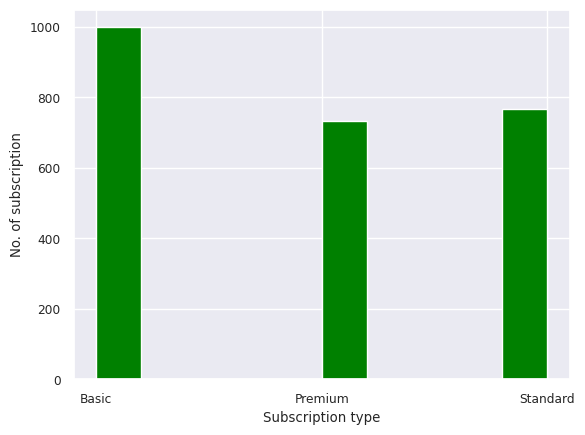

In [83]:
netflix['Subscription_Type'].hist(color= 'green')
plt.xlabel('Subscription type')
plt.ylabel('No. of subscription')

plt.show()

In [84]:
netflix['Country'].value_counts()

Spain             451
United States     451
Canada            317
Australia         183
Brazil            183
France            183
Germany           183
Italy             183
Mexico            183
United Kingdom    183
Name: Country, dtype: int64

**From the distribution above, we have 451 subscribers from Spain and US, 317 from Canada, 183 subscribers each from Australia, Brazil, France, Germany, Italy, Mexico, and UK.**\
\
The distribution is shown below:

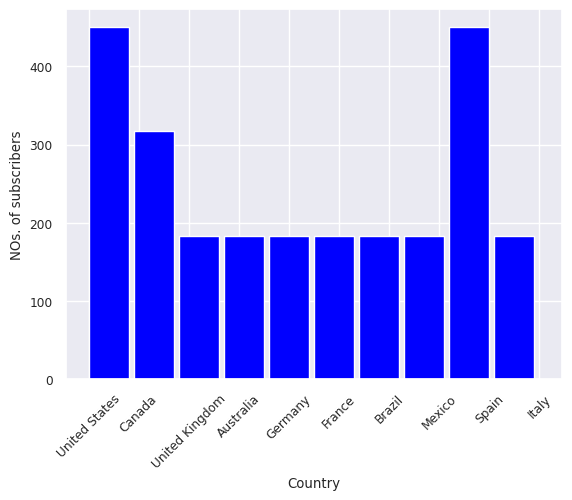

In [106]:
netflix['Country'].hist( color='blue', width= 0.8)
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.ylabel("NOs. of subscribers")
plt.show()

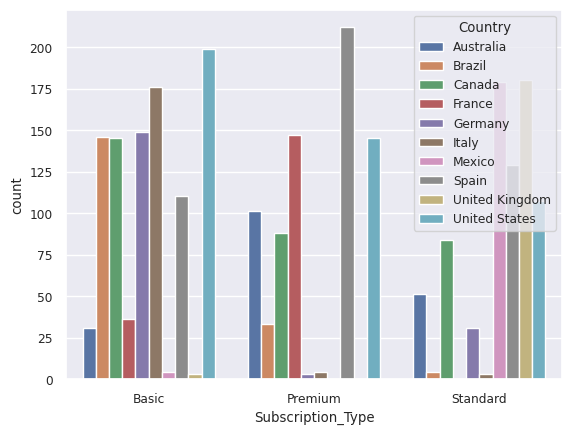

In [86]:
# Visualizing what subscription plan common to each country

sns.countplot(data= netflix, x= "Subscription_Type", hue= "Country")
plt.show()

**From the countplot above, we can deduced that: for the basic package, there are less Uk and Mexico subscribers. The major scribscribers for this package are from the US. \
\
For the premium package, there are less Germany, Italy and no Mexico subscribers. The major scribscribers for this package are from Spain. \
\
For the standard package, there are less Brazil, Italy and no France subscribers. The major scribscribers for this package are from UK and Mexico.**

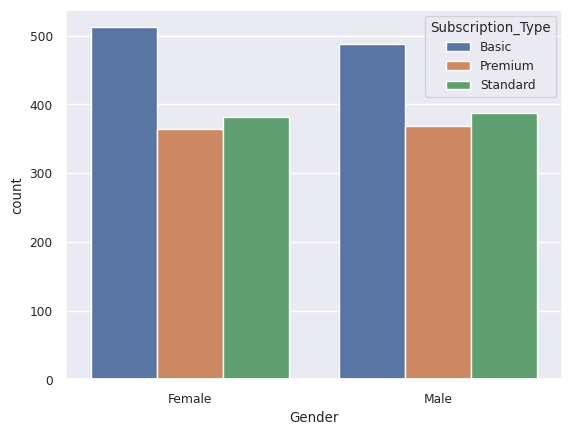

In [108]:
sns.countplot(data= netflix, x= "Gender", hue= "Subscription_Type")
plt.show()

**From the countplot above, the gender distribution of the packages subscribed is shown. The distribution shown that both male and female tends to subscribe for the basic package.**

## Prediction

In [109]:
netflix["Device"].value_counts()

Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: Device, dtype: int64

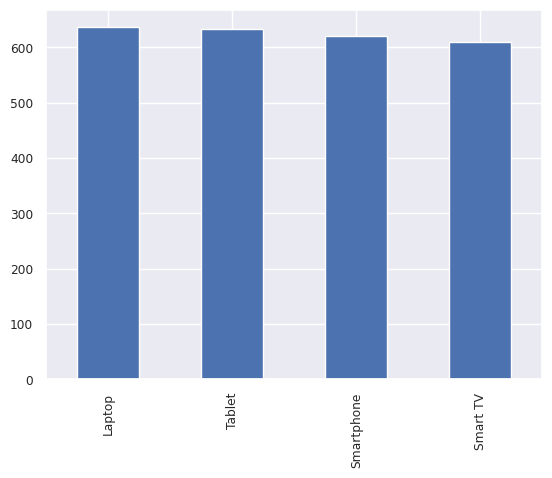

In [88]:
netflix["Device"].value_counts().plot.bar()
plt.show()

**The distribution above shows the devices used by the subscribers. It is clearly shown that there are more Laptop users subscribing to the netflix packages.**

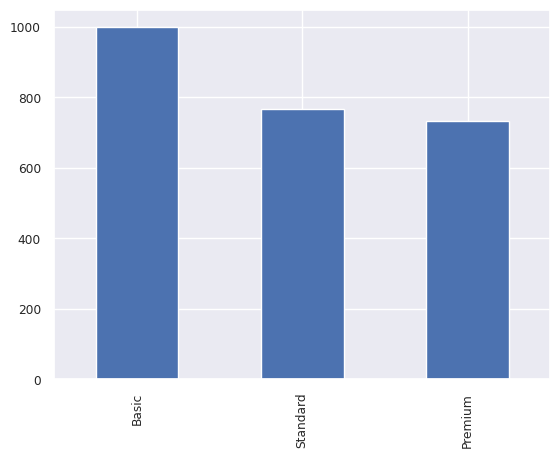

In [89]:
netflix["Subscription_Type"].value_counts().plot.bar()
plt.show()

**We can see from the distribution above that, we have more subscribers that subscribed the Basic package, followed by the Standard package and then the Premium package.**

In [90]:
netflix.corr()

/tmp/ipykernel_32/2461069083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  netflix.corr()


,Monthly_Revenue,Age
Monthly_Revenue,1.000000,-0.021143
Age,-0.021143,1.000000


/tmp/ipykernel_32/1190570003.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(netflix.corr(), annot= True)


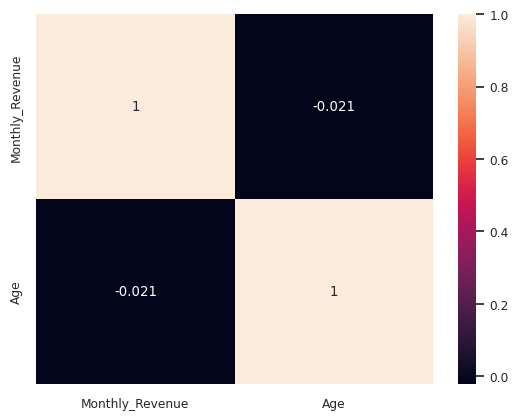

In [91]:
sns.heatmap(netflix.corr(), annot= True)
plt.show()

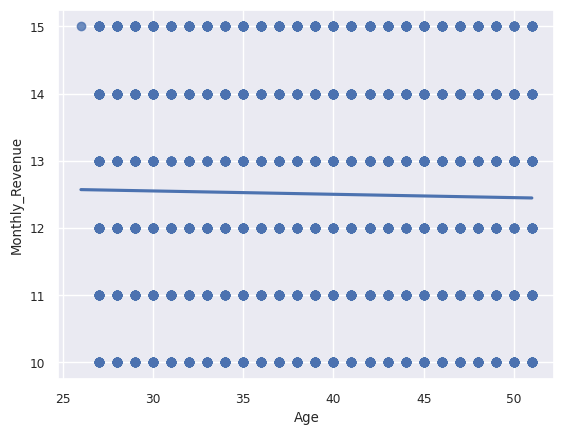

In [92]:
sns.regplot(data= netflix, x="Age", y="Monthly_Revenue", ci= None)
plt.show()

**From the correlation matrix and scatter plot above, we can see that there is weak and negative relationship between the age and monthly revenue of subscribers.**